In [1]:
import acquire, prepare, csv, json
from env import github_token, github_username
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, \
                                            CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
plt.rc('figure', figsize=(14,8))
plt.rc('font', size=13)

In [3]:
# acquire.acquire_repo_list('petroleum')
# acquire.acquire_repo_list('solar energy')
# acquire.acquire_repo_list('natural gas')

In [4]:
# df = acquire.scrape_github_data()

In [5]:
# len(df)

In [6]:
# full_list = []
# for file in os.listdir():
#     if 'repos.json' in file:
#         full_list.append(file)
# item_list = []
# for item in full_list:
#     lm = pd.read_json(item)
#     item_list += (list(lm[0]))
# REPOS = item_list
# len(REPOS)

In [7]:
# REPOS

In [8]:
# frame = [acquire.process_repo(repo) for repo in REPOS]

In [9]:
# len(frame)

In [10]:
# frame

In [11]:
# pd.DataFrame(frame).to_csv('all_repos_dict.csv', index=False)

In [12]:
# pd.read_json('data.json')

In [13]:
# url = 'https://github.com/search?o=desc&p=1&q=petroleum&s=stars&type=Repositories'
# headers = {'User-Agent': 'manual search'} 
# response = get(url, headers=headers)
# # print(response.status_code)
# soup = BeautifulSoup(response.content, 'html.parser')

In [14]:
# soup.find_all('a', class_='v-align-middle')[0].text

In [15]:
# def get_repo_names(url):
#     headers = {'User-Agent': 'manual search'} 
#     response = get(url, headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     repos = []
#     for i in range(10):
#         repos.append(soup.find_all('a', class_='v-align-middle')\
#                  [i].text)
#         time.sleep(.8)
#     return repos

In [16]:
# url = 'https://github.com/search?o=desc&p=1&q=petroleum&s=stars&type=Repositories'
# get_repo_names(url)

In [17]:
# urls = [f'https://github.com/search?o=desc&p={i}\
# &q=petroleum+size%3A>100&s=stars&type=Repositories' \
# for i in range(1,11)]
# urls[0]

In [18]:
# if not os.path.isfile(f'{category}.json'):
#     lol.to_csv('data.csv')
# data = pd.read_csv('data.csv', header=None, index_col=0,
#                   names=['number','repo'])

In [19]:
# def acquire_repo_list(category):
#     if (' ') in category:
#         category = category.replace(' ','_')
#         f_category = category.replace(' ','+')

#     urls = [f'https://github.com/search?o=desc&p={i}\
#     &q={f_category}+size:>100&s=stars&type=Repositories'\
#     for i in range(1,11)]

#     test = []
#     for url in urls:
#         test += get_repo_names(url)
        
#     if not os.path.isfile(f'{category}.json'):  
#         json.dump(test, open(f"{category}_repos.json", "w"),
#                   indent=1)
    
#     return test

In [20]:
# solar = acquire_repo_list('solar energy')

In [21]:
# len(solar)

In [22]:
# lm = pd.read_json('solar_energy_repo.json')
# list(lm[0])

In [23]:
# gas = acquire_repo_list('natural gas')

In [24]:
# len(gas)

In [25]:
# full_list = []
# for file in os.listdir():
#     if 'repo.json' in file:
#         full_list.append(file)
# full_list

In [26]:
# for i, item in enumerate(full_list):
#     locals()['lm'+str(i)] = pd.read_json(item)
# repo_list = []
# for i in range(len(full_list)):
#     repo_list.append(list('lm'+str(i))[0])
# repo_list

In [27]:
# item_list = []
# for item in full_list:
#     lm = pd.read_json(item)
#     item_list += (list(lm[0]))

In [28]:
# item_list

In [29]:
# lm = pd.read_json('natural_gas_repo.json')
# lm2 = pd.read_json('solar_energy_repo.json')
# len(list(lm[0]) + list(lm2[0]))

In [30]:
# test = []
# for url in urls:
#     test += get_repo_names(url)

# len(test)

In [31]:
# test

In [32]:
# lol = pd.Series(test)
# test[:6]

In [33]:
# if not os.path.isfile('data.csv'):
#     lol.to_csv('data.csv')
# data = pd.read_csv('data.csv', header=None, index_col=0,
#                   names=['number','repo'])

In [34]:
# data_list = list(data.repo)

In [35]:
# repo = 'gocodeup/codeup-setup-script'

In [36]:
# acquire.scrape_github_data()

In [37]:
# pd.read_json('solar_energy_repo.json')

In [38]:
df = pd.read_csv('all_repos_dict.csv')

df['category'] = 'unknown'

df.loc[:100, 'category'] = 'solar_energy'
df.loc[100:200, 'category'] = 'petroleum'
df.loc[200:, 'category'] = 'natural_gas'
df = df[['language','category','repo','readme_contents']]
df.head()

,language,category,repo,readme_contents
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...


In [39]:
df[df.readme_contents.isna()]

,language,category,repo,readme_contents
66,R,solar_energy,rockclimber112358/solar-energy-forecasting,NaN
182,Java,petroleum,Rakesh2017/PetroleumDriver,NaN
254,Python,natural_gas,guitar1999/gas_logging,NaN


In [40]:
df[df.language.isna()].category.value_counts()

natural_gas     12
petroleum        9
solar_energy     7
Name: category, dtype: int64

In [41]:
df = prepare.prep_repo_data(df)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [42]:
df = df[df.index!=15]

In [43]:
df.clean_lemmatized.apply(len).nlargest(5)

16    16389
47    10445
72     7272
95     7017
8      6776
Name: clean_lemmatized, dtype: int64

In [44]:
df.shape

(213, 7)

In [45]:
df['word_count'] = df.clean_lemmatized.str.split().apply(len)

In [46]:
df = df.replace('Matlab','MATLAB')

In [47]:
low = df.language.value_counts() < 5

In [48]:
low_lang = [low.index[i] for i, x in enumerate(low) if x]

In [49]:
df = df[~df.language.isin(low_lang)]

In [50]:
top_4_lang = list(df.language.value_counts().head(4).index)
top_4_lang_df = df[df.language.isin(top_4_lang)]

In [51]:
top_4_lang_df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...,123
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...,410
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...,127
8,Python,solar_energy,sibyjackgrove/SolarPV-DER-simulation-utility,**Status:** Expect regular updates and bug fix...,"[status, expect, regular, updates, and, bug, f...",statu expect regular updat bug fix util simul ...,status expect regular update bug fix utility s...,596
9,Python,solar_energy,zygmuntz/kaggle-solar,kaggle-solar\n============\n\nSee [http://fast...,"[kagglesolar, see, httpfastmlcompredictingsola...",kagglesolar see httpfastmlcompredictingsolaren...,kagglesolar see httpfastmlcompredictingsolaren...,21
...,...,...,...,...,...,...,...,...
204,JavaScript,natural_gas,mariorodeghiero/datopian,"<div align=""center"">\n\n<p>Check online <a hre...","[div, aligncenter, pcheck, online, a, hrefhttp...",div aligncent pcheck onlin hrefhttpsmariorodeg...,div aligncenter pcheck online hrefhttpsmarioro...,99
206,Jupyter Notebook,natural_gas,jamesbews/ENSF-519,# ENSF-519\nENSF 519 Natural Gas Pricing Machi...,"[ensf519, ensf, 519, natural, gas, pricing, ma...",ensf519 ensf 519 natur ga price machin learn,ensf519 ensf 519 natural gas pricing machine l...,8
207,Jupyter Notebook,natural_gas,caoxiaole/Natural-gas-consumption-in-American-...,# Natural-gas-consumption-in-American-families...,"[naturalgasconsumptioninamericanfamilies, usin...",naturalgasconsumptioninamericanfamili use pyth...,naturalgasconsumptioninamericanfamilies using ...,18
210,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...,272


In [52]:
lang_wordcount = df.groupby('language').word_count\
                        .mean().sort_values(ascending=False)
lang_wordcount

language
Python              266.214286
C++                 236.923077
HTML                192.357143
MATLAB              176.750000
C                   174.285714
Jupyter Notebook    155.108108
JavaScript          128.000000
R                   112.750000
CSS                  99.000000
Java                 97.812500
PHP                  89.375000
Name: word_count, dtype: float64

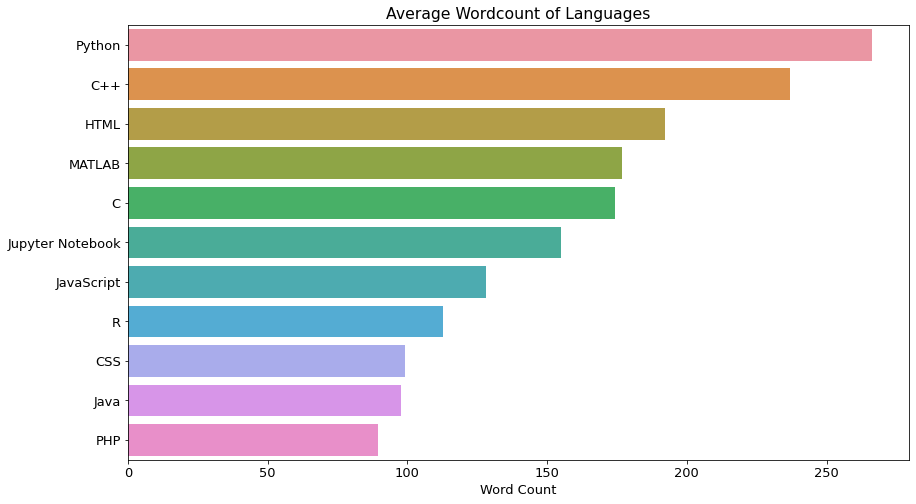

In [53]:
ax = sns.barplot(x=lang_wordcount.values, 
                 y=lang_wordcount.index)
ax.set(title='Average Wordcount of Languages', xlabel='Word Count', 
      ylabel='')
plt.show()

In [54]:
documents = df[['repo','language', 'clean_lemmatized']]
documents_top_4 = top_4_lang_df[['repo','language', 'clean_lemmatized']]
documents_top_4

,repo,language,clean_lemmatized
0,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,Python,machinelearningforsolarenergyprediction adele ...
1,meltaxa/solariot,Python,solariot leverage iot enabled solar pv inverte...
2,renewables-ninja/gsee,Python,master branch build statushttpsimgshieldsioazu...
8,sibyjackgrove/SolarPV-DER-simulation-utility,Python,status expect regular update bug fix utility s...
9,zygmuntz/kaggle-solar,Python,kagglesolar see httpfastmlcompredictingsolaren...
...,...,...,...
204,mariorodeghiero/datopian,JavaScript,div aligncenter pcheck online hrefhttpsmarioro...
206,jamesbews/ENSF-519,Jupyter Notebook,ensf519 ensf 519 natural gas pricing machine l...
207,caoxiaole/Natural-gas-consumption-in-American-...,Jupyter Notebook,naturalgasconsumptioninamericanfamilies using ...
210,fernandessfae/Evolucao-da-producao-de-gas-natu...,Python,projeto datascience evoluo da produo de g natu...


## All - TFIDF

In [139]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        random_state=42, stratify=y, train_size=.7)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier().fit(X_train, y_train)

train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.5714
0.2807


## Top 4 - TFIDF

In [87]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        stratify=y, train_size=.7, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
model = KNeighborsClassifier().fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.6951
0.6667


## All - CountVector

In [88]:
cv = CountVectorizer()
X = cv.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        stratify=y, train_size=.7, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
model = KNeighborsClassifier().fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.4812
0.1754


## Top 4 - CountVector

In [89]:
cv = CountVectorizer()
X = cv.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        stratify=y, train_size=.7, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
model = KNeighborsClassifier().fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.4024
0.3056


## Using bigrams

In [128]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X = tfidf.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        random_state=42, stratify=y, train_size=.7)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier().fit(X_train, y_train)

train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.406
0.2982


In [130]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X = tfidf.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        stratify=y, train_size=.7, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier().fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.561
0.5556


In [108]:
cv = CountVectorizer(ngram_range=(2, 2))
X = cv.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        stratify=y, train_size=.7, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier().fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.406
0.2982


In [117]:
cv = CountVectorizer(ngram_range=(2, 2))
X = cv.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        stratify=y, train_size=.7, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
model = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_train, y_train)
# model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=42).fit(X_train, y_train)
# model = KNeighborsClassifier().fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

print(round(model.score(X_train, y_train), 4))
print(round(model.score(X_test, y_test), 4))

0.561
0.4722
